# Упражнение 2

Цель упражнения - применить на практике инструменты работы с текстом.

Дан файл, который получен с помощью API уже знакомого ресурса op.itmo.ru (эндпойнт https://op.itmo.ru/api/item/)

In [ ]:
!gdown 1rI1qJbbt9iYSe0sKT9tDNwZTGwMuu-tR

In [ ]:
import pandas as pd
import json

In [ ]:
df = pd.read_excel ('/content/items.xlsx', usecols=['id', 'name', 'domain', 'value'])

In [ ]:
df.sample (3)

,id,name,domain,value
21475,26202,Мониторинг работы и диагностика компрессоров,"{'id': 147, 'name': 'Машиностроение'}",1
11602,13648,Роль исследования в развитии систем управления,"{'id': 34, 'name': 'Теория управления'}",0
15745,24758,"Моносахариды: классификация, природные источни...","{'id': 24, 'name': 'Химия'}",2


In [ ]:
df.shape

(22160, 4)

Описание данных: id - идентификатор учебной сущности, name - название учебной сущности, domain - информация о предметной области (id - идентификатор предметной области, namе - название предметной области), value - значение, которое можно интерпретировать как важность учебной сущности в системе.

## Задание 2.1

Посчитайте количество разных предметных областей.

Выведите их id, название и количество разных учебных сущностей, относящихся к конкретной предметной области.

Сделайте визуализацию предметных областей.

In [ ]:
def get_fields(json_str):
    json_str = json_str.replace("'", '"')
    json_obj = json.loads(json_str)
    id = json_obj['id']
    name = json_obj['name']
    return id, name

In [ ]:
df = df.dropna()
df.shape

(19223, 4)

In [ ]:
df[['d_id', 'd_name']] = df['domain'].apply(lambda x: pd.Series(get_fields(x)))

In [ ]:
df.head(3)

,id,name,domain,value,d_id,d_name
0,202,Алгоритм Форда-Фалкерсона,"{'id': 15, 'name': 'Теория графов (часть Матем...",28,15,Теория графов (часть Математики)
1,16866,Обратные задачи биофизики,"{'id': 21, 'name': 'Биотехнологии'}",0,21,Биотехнологии
2,204,Теорема Холла,"{'id': 15, 'name': 'Теория графов (часть Матем...",9,15,Теория графов (часть Математики)


In [ ]:
# Посчитайте количество разных предметных областей.
df.nunique()

id        19223
name      18747
domain       61
value       168
d_id         61
d_name       61
dtype: int64

In [ ]:
# Выведите их id, название и количество разных учебных сущностей, относящихся к конкретной предметной области.
x = df.groupby(['d_id'])['name'].count()
print(x)
print(df.groupby(['d_id', 'd_name'])['name'].count().sum())
print(df.shape)

d_id
11      994
14      710
15       59
16      104
17     3706
       ... 
419       4
421       8
422      17
423      29
424       7
Name: name, Length: 61, dtype: int64
19223
(19223, 6)


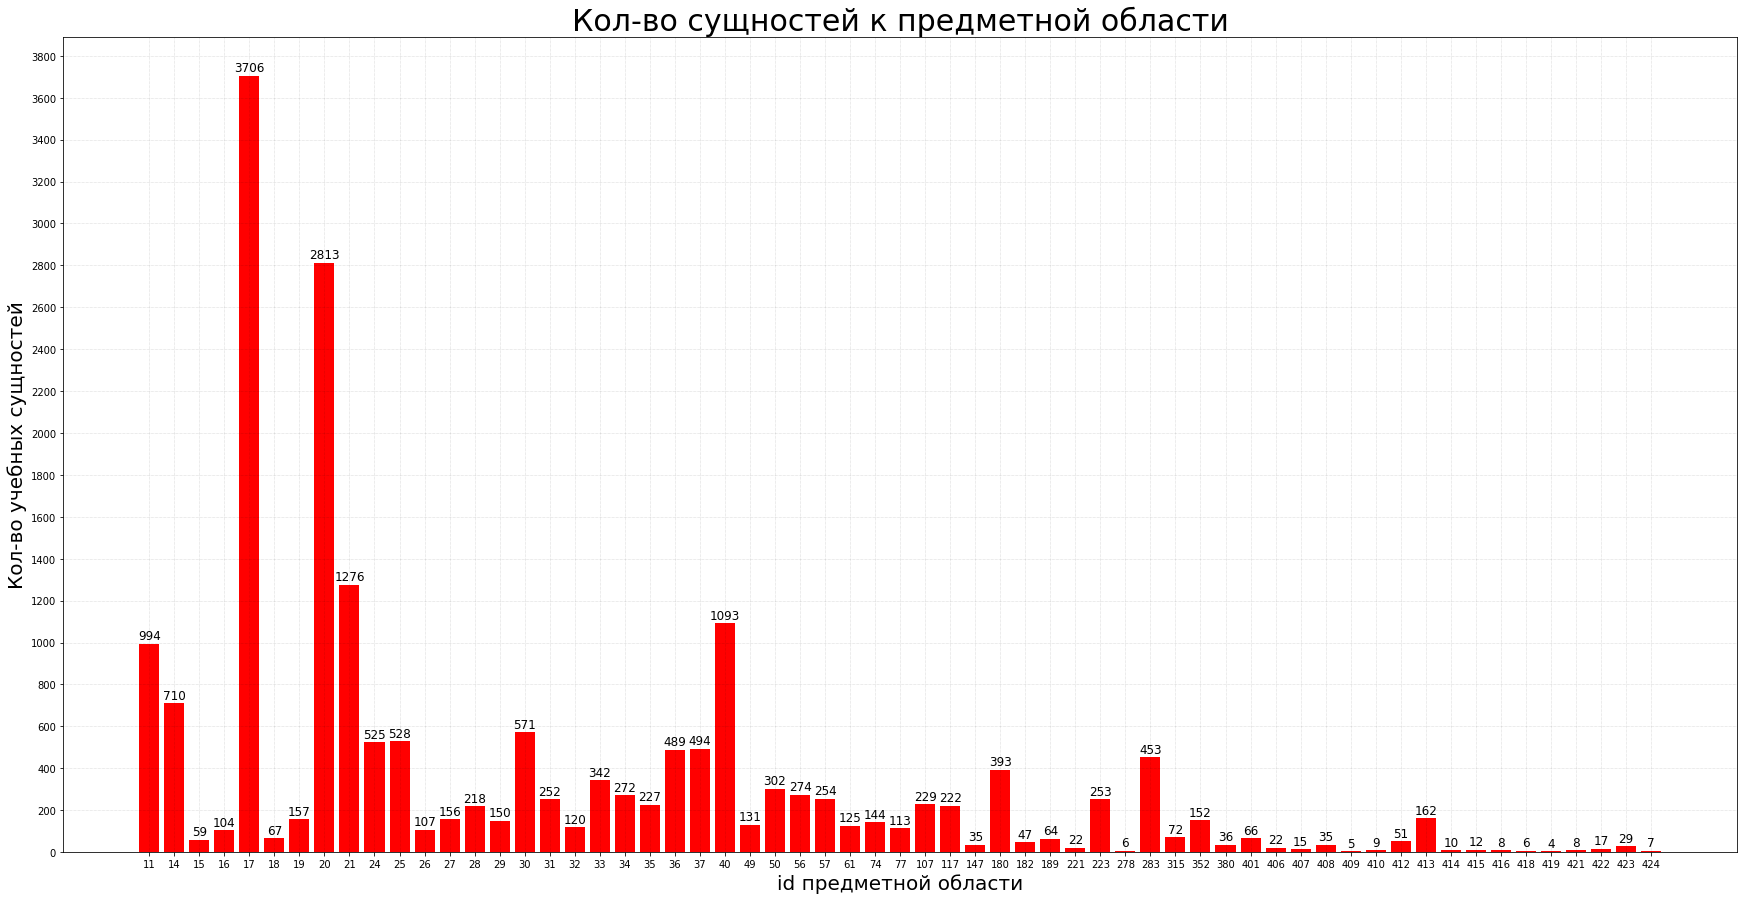

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

xplt = list(map(str, x.index.tolist()))
yplt = x.tolist()
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_title('Кол-во сущностей к предметной области', fontsize = 30)
ax.set_xlabel('id предметной области', fontsize = 20)
ax.set_ylabel('Кол-во учебных сущностей', fontsize = 20)
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black', alpha=0.3)
ax.bar(xplt, yplt, color='r')
for i in range(len(yplt)):
        plt.text(i, yplt[i]+20, yplt[i], ha = 'center', fontsize = 12)
plt.show()

## Задание 2.2

Учебные сущности чаще всего представляют собой отдельные слова или словосочетания. Однако, в некоторых случаях ключевое слово состоит из большого количества слов. Посчитайте количество слов в названии каждой ключевой сущности. Выведите первые 25 учебных сущностей (id, name, количество слов), упорядоченные по убыванию количества слов.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('russian')
import string
string.punctuation

In [ ]:
def filter_line(line):
    before = line.split()

    for ch in string.punctuation:
      line = line.replace(ch,"")

    cur = []
    line = line.split()
    for w in line:
      if w not in sw:
        cur.append(w)
    line = cur

    print(f'before={before}, after={line}', end='. ')

    return line

In [ ]:
df['num_words'] = df['name'].apply(lambda x: len(filter_line(x)))

before=['Алгоритм', 'Форда-Фалкерсона'], after=['Алгоритм', 'ФордаФалкерсона']. before=['Обратные', 'задачи', 'биофизики'], after=['Обратные', 'задачи', 'биофизики']. before=['Теорема', 'Холла'], after=['Теорема', 'Холла']. before=['Adjustment', 'of', 'optical', 'instruments'], after=['Adjustment', 'of', 'optical', 'instruments']. before=['Diffraction', 'of', 'rays', 'in', 'crystals'], after=['Diffraction', 'of', 'rays', 'in', 'crystals']. before=['Personal', 'Radio', 'Access', 'Systems'], after=['Personal', 'Radio', 'Access', 'Systems']. before=['Optimal', 'controller', 'design', 'for', 'linear', 'time-invariant', 'plants'], after=['Optimal', 'controller', 'design', 'for', 'linear', 'timeinvariant', 'plants']. before=['Архитектура', 'хранения', 'данных'], after=['Архитектура', 'хранения', 'данных']. before=['Общестроительное', 'проектирование', 'предприятий', 'молочной', 'промышленности'], after=['Общестроительное', 'проектирование', 'предприятий', 'молочной', 'промышленности']. befor

In [ ]:
df[['id', 'name', 'num_words']].sort_values(by='num_words', ascending=False).head(25)

,id,name,num_words
14949,19806,определять степени принадлежности элементов за...,65
17581,19828,навыки решения следующих практических задач: п...,64
17462,19825,навыки решения следующих практических задач: п...,60
17476,19823,"умение доказывать, что: заданный неограф являе...",54
233,19814,навыки решения следующих практических задач: н...,50
22019,26723,"Able to independently acquire, develop and app...",45
17512,19839,навыки решения следующих практических задач: п...,44
448,21853,Результатом освоения дисциплины должно стать ф...,39
500,20677,Знание базовых понятий физиологических механи...,37
17517,19840,"умение доказывать, что данная сеть Петри облад...",35


## Задание 2.3

Названия учебных сущностей должны начинаться с заглавной буквы. В конце названия не должно быть пробела и/или знака препинания (точка, запятая, восклицательный знак и т.п.). Будем называть ошибочными сущности, названия которых не удовлетворяют хотя бы одному из этих двух условий.

Выведите все ошибочные сущности (id и name), сгруппированные по предметной области.

In [ ]:
import re

template = r'^[a-zа-я]|[\s.,!?]$'
df['ch_for_tem'] = df['name'].apply(lambda x: bool(re.search(template, x)))

In [ ]:
error_df = df[df['ch_for_tem'] == True]
ans2_3 = error_df.groupby('d_name')[['id','name']].apply(lambda x: x.values.tolist())

In [ ]:
ans2_3[2]

[[24800, 'микроорганизмы'],
 [24807, 'лигирования молекулы плазмидной ДНК'],
 [7279, 'Механизм клеточного деления,'],
 [24663, 'методы исследования готовой пищевой продукции'],
 [24005, 'genetic engineering tools'],
 [24006, 'protein engineering'],
 [24001, 'инструменты генетической инженерии'],
 [24010, 'recombinations'],
 [22727, 'основы научных исследований'],
 [24795, 'проводить модификацию свойств пищевого сырья'],
 [25800,
  'математика, общая биотехнология, прикладная термодинамика для биотехнологов'],
 [25807, 'nutritionology'],
 [25808, 'nutritional physiology'],
 [25838, 'dietary supplement technology'],
 [25839, 'research planning'],
 [26013, 'основы проектирования биотехнологических производств']]

In [ ]:
ans2_3.head(2)

d_name
Optics (Оптика)                   [[26839, luminescence microscopy]]
Soft Skills        [[23731, навыки проведения научно-исследовател...
dtype: object

## Задание 2.4

В систему существуют дублирующиеся учебные сущности. На картинке снизу приведен пример: матрица и матрицы - это на самом деле одна и та же учебная сущность.

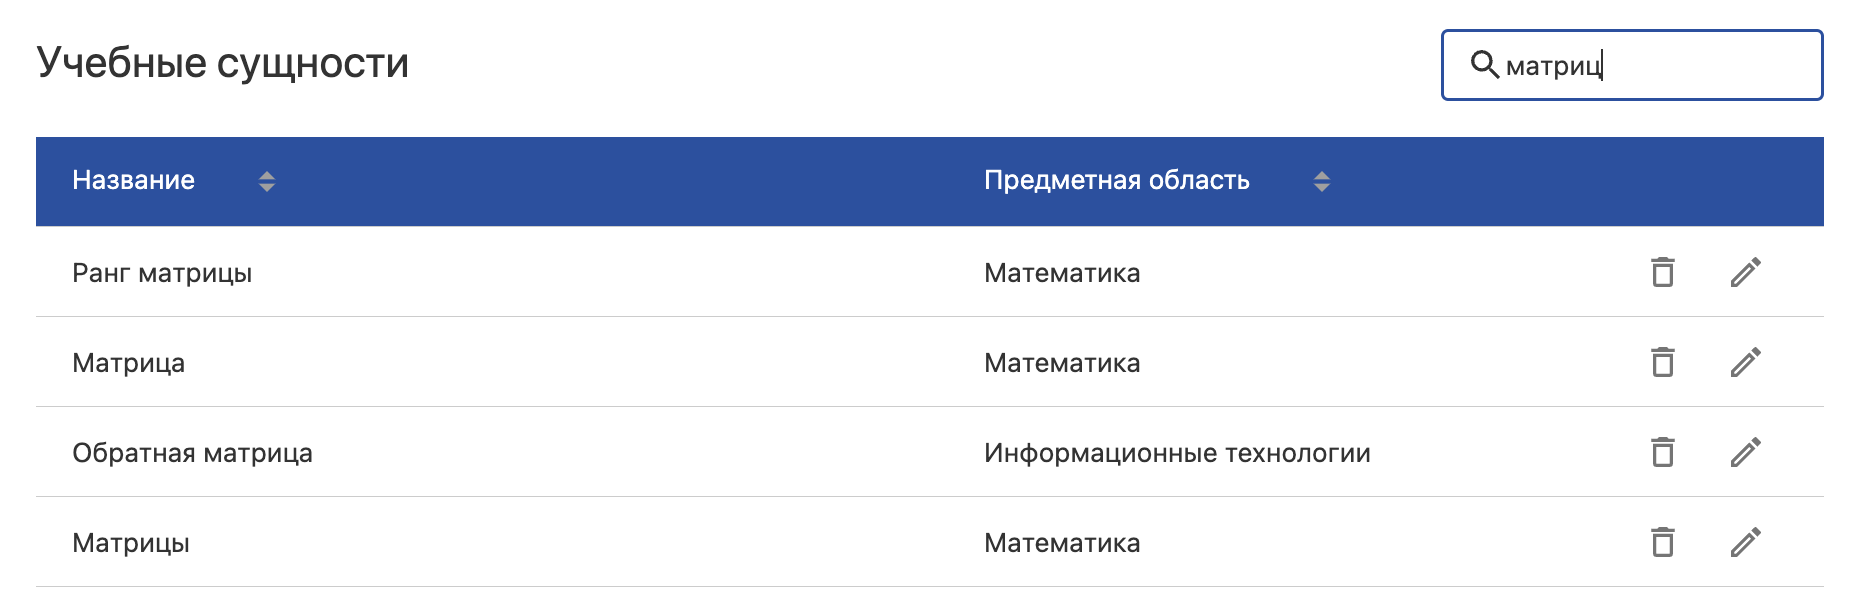

Ещё один пример. Дулирующиеся сущности подчеркнуты красным цветом.

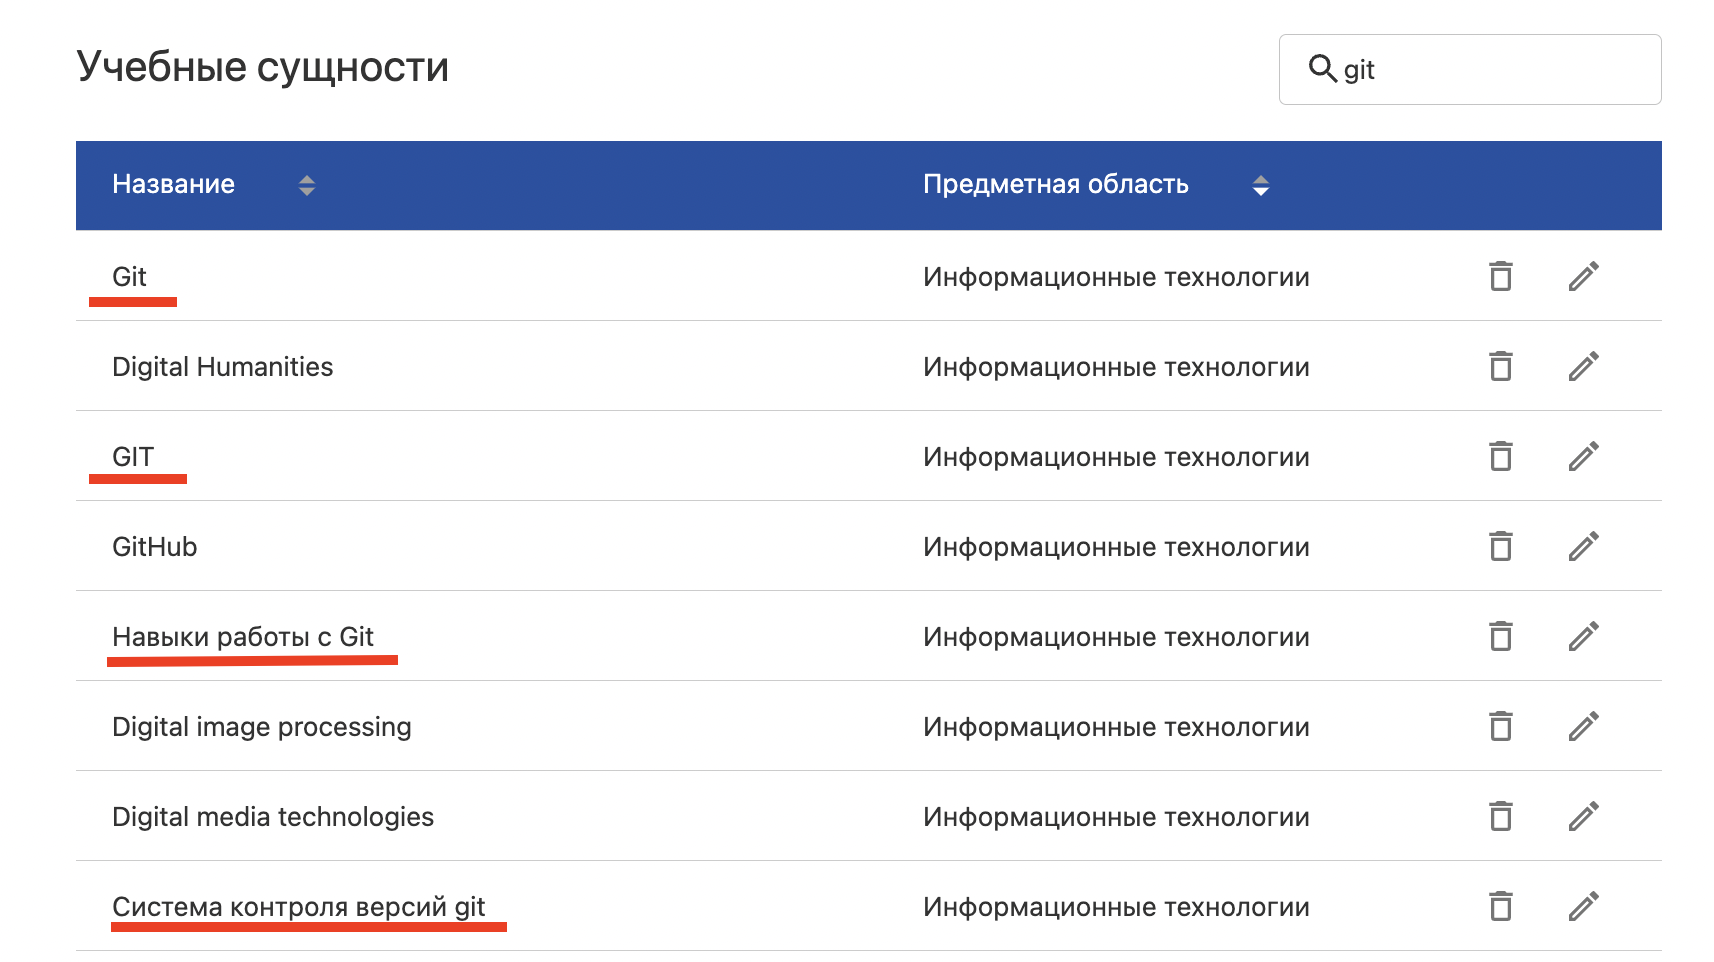

Сформулируйте несколько (больше трёх) критериев для поиска дублирующихся сущностей. Перечислите их.

Реализуйте поиск дублирующихся сущностей по приведенным критериям. Результат выводелите в следующем формате:
* учебную сущность id name нужно объединить с учебной сущностью id name

In [ ]:
%%capture
!pip install pymorphy2

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowballRu = SnowballStemmer("russian")
snowballEn = SnowballStemmer("english")
import pymorphy2
analyzer = pymorphy2.MorphAnalyzer()

In [ ]:
from nltk.corpus import stopwords
swr = stopwords.words('russian')
swe = stopwords.words('english')

def remove_stop_words(list_text):
  buf = []
  for w in list_text:
    if w not in swr and w not in swe:
      buf.append(w)
  return buf

In [ ]:
def normal_forms_and_set(list_text):
  buf = []
  for w in list_text:
    aw = analyzer.parse(w)[0]
    buf.append(aw.normal_form)
  return list(set(buf))

In [ ]:
df['clean_name'] = df['name'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['clean_name'] = df['clean_name'].apply(str.lower)
df['clean_name'] = df['clean_name'].apply(word_tokenize)
df['clean_name'] = df['clean_name'].apply(remove_stop_words)
df['clean_name'] = df['clean_name'].apply(normal_forms_and_set)
df['clean_name'] = df['clean_name'].apply(sorted)
df['clean_name'] = df['clean_name'].apply(' '.join)
df['clean_name'].head(5)

0           алгоритм фордафалкерсон
1          биофизик задача обратный
2                      теорема холл
3    adjustment instruments optical
4         crystals diffraction rays
Name: clean_name, dtype: object

In [ ]:
group_by_dom_clean = df.groupby(['d_id', 'clean_name'])

In [ ]:
for key, val in group_by_dom_clean:
  cur_val = group_by_dom_clean.get_group(key)
  if cur_val.shape[0] > 1:
    display(cur_val[['id', 'name']])

Очень большой вывод результата после исполнения скрипта, поэтому убрал